# Split data

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

In [3]:
#setting = 'AR'         # 'AR', 'GARCH, 'ARIMA
#test_size = 0.1           # proportion of test set
#val_size = 0.2            # proportion of validation set
#lags = 1                  # number of lags as features

In [4]:
#path = 'C:/Users/Meier/Dropbox (Institut für Statistik)/Structural Breaks + DL/Simulation/Python Code/' 

[https://towardsdatascience.com/building-rnn-lstm-and-gru-for-time-series-using-pytorch-a46e5b094e7b](https://towardsdatascience.com/building-rnn-lstm-and-gru-for-time-series-using-pytorch-a46e5b094e7b)

In [5]:
def generate_time_lags(df, col_name, n_lags):
    df_n = df[[col_name]].copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n[col_name].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n.reset_index(drop=True)

In [6]:
def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

In [7]:
def train_val_test_split(df, target_col, val_size, test_size):
    val_size_new = np.round(val_size / (1 - test_size),10)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size_new, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [20]:
def split_data(setting, params, path, test_size, val_size, lags=1):
    
    # set number of simulations per setting
    if setting == 'AR':
        num_sim = params.shape[0] 
    if setting == 'GARCH':
        num_sim = len(params)              
    if setting == 'ARIMA':
        num_sim = params[0].shape*params[1].shape 
    
    # loop over all DGP settings
    for j in range(num_sim):

        # load simulated data
        sim = pd.read_csv(path+'sim%s.csv' %(j+1) ,sep=',',na_values = 'NA')

        # loop over all break settings
        for i in range(len(sim.columns)):

            # get and save splits
            df_generated = generate_time_lags(sim, sim.columns[i], lags)
            X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df_generated, sim.columns[i], val_size, test_size)
            #print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
            if all([x in sim.columns[i] for x in ['Tau','Ref']]):
                np.savez(path+'sim%s_%s.npz' %((j+1),sim.columns[i]), X_train=X_train.dropna(), X_val=X_val, X_test=X_test, y_train=y_train.dropna()[1:], y_val=y_val, y_test=y_test)
            else:
                np.savez(path+'sim%s_%s.npz' %((j+1),sim.columns[i]), X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
    
        del sim

In [21]:
#split_data(setting=setting, path=path+'Temp/', test_size=test_size, val_size=val_size)

(3500, 1) (3499, 1)
          lag1
3495 -0.388571
3496 -1.636168
3497  2.060204
3498  0.373026
3499  0.471626
           Ref
3495 -1.636168
3496  2.060204
3497  0.373026
3498  0.471626
3499  0.277803
-------------------------------
(3050, 1) (3050, 1)
          lag1
3495 -0.388571
3496 -1.636168
3497  2.060204
3498  0.373026
3499  0.471626
      Tau0.1Ref
3495  -1.636168
3496   2.060204
3497   0.373026
3498   0.471626
3499   0.277803
-------------------------------
(3500, 1) (3499, 1)
          lag1
3495 -0.388571
3496 -1.636168
3497  2.060204
3498  0.373026
3499  0.471626
      Tau0.1Beta0.5
3495      -1.636168
3496       2.060204
3497       0.373026
3498       0.471626
3499       0.277803
-------------------------------
(3500, 1) (3499, 1)
          lag1
3495 -0.388571
3496 -1.636168
3497  2.060204
3498  0.373026
3499  0.471626
      Tau0.1Beta1.0
3495      -1.636168
3496       2.060204
3497       0.373026
3498       0.471626
3499       0.277803
-------------------------------
(3500,

      Tau0.6Ref
3495  -2.235925
3496  -0.357723
3497  -0.390804
3498  -2.044306
3499  -0.770628
-------------------------------
(3500, 1) (3499, 1)
          lag1
3495 -1.533765
3496 -2.235925
3497 -0.357723
3498 -0.390804
3499 -2.044306
      Tau0.6Beta0.5
3495      -2.235925
3496      -0.357723
3497      -0.390804
3498      -2.044306
3499      -0.770628
-------------------------------
(3500, 1) (3499, 1)
          lag1
3495 -1.533765
3496 -2.235925
3497 -0.357723
3498 -0.390804
3499 -2.044306
      Tau0.6Beta1.0
3495      -2.235925
3496      -0.357723
3497      -0.390804
3498      -2.044306
3499      -0.770628
-------------------------------
(3500, 1) (3499, 1)
          lag1
3495 -1.533765
3496 -2.235925
3497 -0.357723
3498 -0.390804
3499 -2.044306
      Tau0.6Beta2.0
3495      -2.235925
3496      -0.357723
3497      -0.390804
3498      -2.044306
3499      -0.770628
-------------------------------
(350, 1) (350, 1)
          lag1
3495 -1.533765
3496 -2.235925
3497 -0.357723
3498 -0.

(2150, 1) (2150, 1)
          lag1
3495 -1.598019
3496 -2.366271
3497 -1.527624
3498 -1.334826
3499 -1.677557
      Tau0.3Ref
3495  -2.366271
3496  -1.527624
3497  -1.334826
3498  -1.677557
3499  -2.479060
-------------------------------
(3500, 1) (3499, 1)
          lag1
3495 -1.598019
3496 -2.366271
3497 -1.527624
3498 -1.334826
3499 -1.677557
      Tau0.3Beta0.5
3495      -2.366271
3496      -1.527624
3497      -1.334826
3498      -1.677557
3499      -2.479060
-------------------------------
(3500, 1) (3499, 1)
          lag1
3495 -1.598019
3496 -2.366271
3497 -1.527624
3498 -1.334826
3499 -1.677557
      Tau0.3Beta1.0
3495      -2.366271
3496      -1.527624
3497      -1.334826
3498      -1.677557
3499      -2.479060
-------------------------------
(3500, 1) (3499, 1)
          lag1
3495 -1.598019
3496 -2.366271
3497 -1.527624
3498 -1.334826
3499 -1.677557
      Tau0.3Beta2.0
3495      -2.366271
3496      -1.527624
3497      -1.334826
3498      -1.677557
3499      -2.479060
--------

(3500, 1) (3499, 1)
           lag1
3495 -11.675083
3496 -12.094836
3497 -13.597351
3498 -13.430290
3499 -12.809714
      Tau0.7Beta1.0
3495     -12.094836
3496     -13.597351
3497     -13.430290
3498     -12.809714
3499     -12.181207
-------------------------------
(3500, 1) (3499, 1)
           lag1
3495 -11.675083
3496 -12.094836
3497 -13.597351
3498 -13.430290
3499 -12.809714
      Tau0.7Beta2.0
3495     -12.094836
3496     -13.597351
3497     -13.430290
3498     -12.809714
3499     -12.181207
-------------------------------


In [9]:
#sim = pd.read_csv(path+'Temp/sim1.csv' ,sep=',',na_values = 'NA')
#data1 = np.load(path+'Temp/sim5_%s.npz' %sim.columns[1])
#data2 = np.load(path+'Temp/sim5_%s.npz' %sim.columns[2])

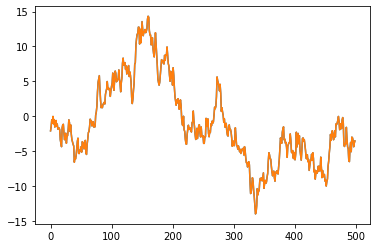

In [15]:
#plt.plot(data1['y_test'])
#plt.plot(data2['y_test'])
#plt.show()

In [16]:
#del data1,data2